In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [3]:
sf = df[['sqft_living', 'price']]
sf.head(2)

,sqft_living,price
0,1180,221900.0
1,2570,538000.0


In [4]:
X = sf.iloc[:, 0:1].values
y = sf.iloc[:, 1:2].values

In [5]:
l2_small_penalty = 1e-5

```bash
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = deg)
X_poly = poly_reg.fit_transform(X)

ridge = Ridge()
ridge.fit(X_poly, y)

ypred = ridge.poly_reg.fit_transform(X)
```

##### Ridge_Poly K_Fold Regression Worked

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

poly_reg = PolynomialFeatures(degree = 15)
X_poly = poly_reg.fit_transform(X)

ridge = Ridge(alpha=l2_small_penalty)
ridge.fit(X_poly, y)

ypred = ridge.predict(poly_reg.fit_transform(X))

scoresMean = np.sqrt(-cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=10)).mean()
scoresSTD = np.sqrt(-cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=10)).std()


print(f"Average RMSE: ${scoresMean:,.0f}")
print(f"Variance RMSE: ${scoresSTD:,.0f}")

Average RMSE: $261,274
Variance RMSE: $13,563


/Users/jimdoone/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.222207412705835e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


##### Ridge_Polynomial_function K_fold

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def score_ridgePolyregression(X, y, deg, l2_penalty):
    """Returns kfold cross validation score for ridge_poly regression"""
    
    poly_reg = PolynomialFeatures(degree = deg)
    X_poly = poly_reg.fit_transform(X)
    
    ridge = Ridge(alpha = l2_penalty)
    ridge.fit(X_poly, y)
    
    ypred = ridge.predict(poly_reg.fit_transform(X))
    
    scoresMean = np.sqrt(-cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=10)).mean()
    scoresSTD = np.sqrt(-cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=10)).std()
    
    print(f"Polynomial Degree: {deg} , l2_penalty: {l2_penalty} ")
    print(f"Average RMSE: ${scoresMean:,.0f}")
    print(f"Variance RMSE: ${scoresSTD:,.0f}")
    print("**************************************************")

In [8]:
Xr = sf.iloc[:, 0:1].values
yr = sf.iloc[:, 1:2].values




In [9]:
model = score_ridgePolyregression(Xr, yr, 5, 10)
model

Polynomial Degree: 5 , l2_penalty: 10 
Average RMSE: $261,274
Variance RMSE: $13,563
**************************************************


##### Pipe Cross Validation K_Fold

In [10]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def pipe_score_ridge_poly_predictions(x, y, deg, l2_penalty):

 
    model = make_pipeline(PolynomialFeatures(deg), Ridge(l2_penalty))
    model.fit(x, y)
    
    ypred = model.predict(x)
    
    scoresMean = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)).mean()
    scoresSTD = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)).std()
    
    print(f"Polynomial Degree: {deg} , l2_penalty: {l2_penalty} ")
    print(f"Average RMSE: ${scoresMean:,.0f}")
    print(f"Variance RMSE: ${scoresSTD:,.0f}")
    print("**************************************************")

In [13]:
pipe = pipe_score_ridge_poly_predictions(Xr, yr, 10, 1000000000)
pipe

Polynomial Degree: 10 , l2_penalty: 1000000000 
Average RMSE: $619,384
Variance RMSE: $1,114,226
**************************************************


In [14]:
for l2_penalty in np.logspace(1, 7, num=13):
    pipe = pipe_score_ridge_poly_predictions(Xr, yr, 10, l2_penalty)
    pipe

Polynomial Degree: 10 , l2_penalty: 10.0 
Average RMSE: $1,077,530
Variance RMSE: $2,405,753
**************************************************
Polynomial Degree: 10 , l2_penalty: 31.622776601683793 
Average RMSE: $1,077,223
Variance RMSE: $2,404,944
**************************************************
Polynomial Degree: 10 , l2_penalty: 100.0 
Average RMSE: $1,076,648
Variance RMSE: $2,403,397
**************************************************
Polynomial Degree: 10 , l2_penalty: 316.22776601683796 
Average RMSE: $1,075,360
Variance RMSE: $2,399,681
**************************************************
Polynomial Degree: 10 , l2_penalty: 1000.0 
Average RMSE: $1,070,578
Variance RMSE: $2,386,660
**************************************************
Polynomial Degree: 10 , l2_penalty: 3162.2776601683795 
Average RMSE: $1,056,413
Variance RMSE: $2,347,752
**************************************************
Polynomial Degree: 10 , l2_penalty: 10000.0 
Average RMSE: $1,017,005
Variance RMSE: $2,239

In [12]:
for l2_penalty in np.logspace(1, 7, num=13):
    model = score_ridgePolyregression(Xr, yr, 10, l2_penalty)
    model

Polynomial Degree: 10 , l2_penalty: 10.0 
Average RMSE: $261,274
Variance RMSE: $13,563
**************************************************
Polynomial Degree: 10 , l2_penalty: 31.622776601683793 
Average RMSE: $261,274
Variance RMSE: $13,563
**************************************************
Polynomial Degree: 10 , l2_penalty: 100.0 
Average RMSE: $261,274
Variance RMSE: $13,563
**************************************************
Polynomial Degree: 10 , l2_penalty: 316.22776601683796 
Average RMSE: $261,274
Variance RMSE: $13,563
**************************************************
Polynomial Degree: 10 , l2_penalty: 1000.0 
Average RMSE: $261,274
Variance RMSE: $13,563
**************************************************
Polynomial Degree: 10 , l2_penalty: 3162.2776601683795 
Average RMSE: $261,274
Variance RMSE: $13,563
**************************************************
Polynomial Degree: 10 , l2_penalty: 10000.0 
Average RMSE: $261,274
Variance RMSE: $13,563
******************************

##### Plot Ridge_Polynomial_Regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
    

def pipe_score_ridge_poly_predictions(x, y, deg, l2_penalty):

 
    model = make_pipeline(PolynomialFeatures(deg), Ridge(l2_penalty))
    model.fit(x, y)
    
    ypred = model.predict(x)
    
    
    plt.figure(figsize=(12,8), dpi=120)
    plt.subplot(111)

    #create a grid with continuous 0.1 steps
    X_grid = np.arange(min(x), max(x)+0.1, 0.1)
    #Need to reshape the above vector into a matrix
    X_grid = X_grid.reshape((len(X_grid),1))
    plt.scatter(x, y, color ='DodgerBlue')
    plt.plot(X_grid, model.predict(X_grid), color ='Gold', label = (f"degree {deg} fit"))
    plt.title(f"Ridge_Polynomial{deg} l2_penalty: {l2_penalty}")
    plt.legend(loc='upper left')
    plt.xlabel("X")
    plt.ylabel("Y ")
    plt.show()

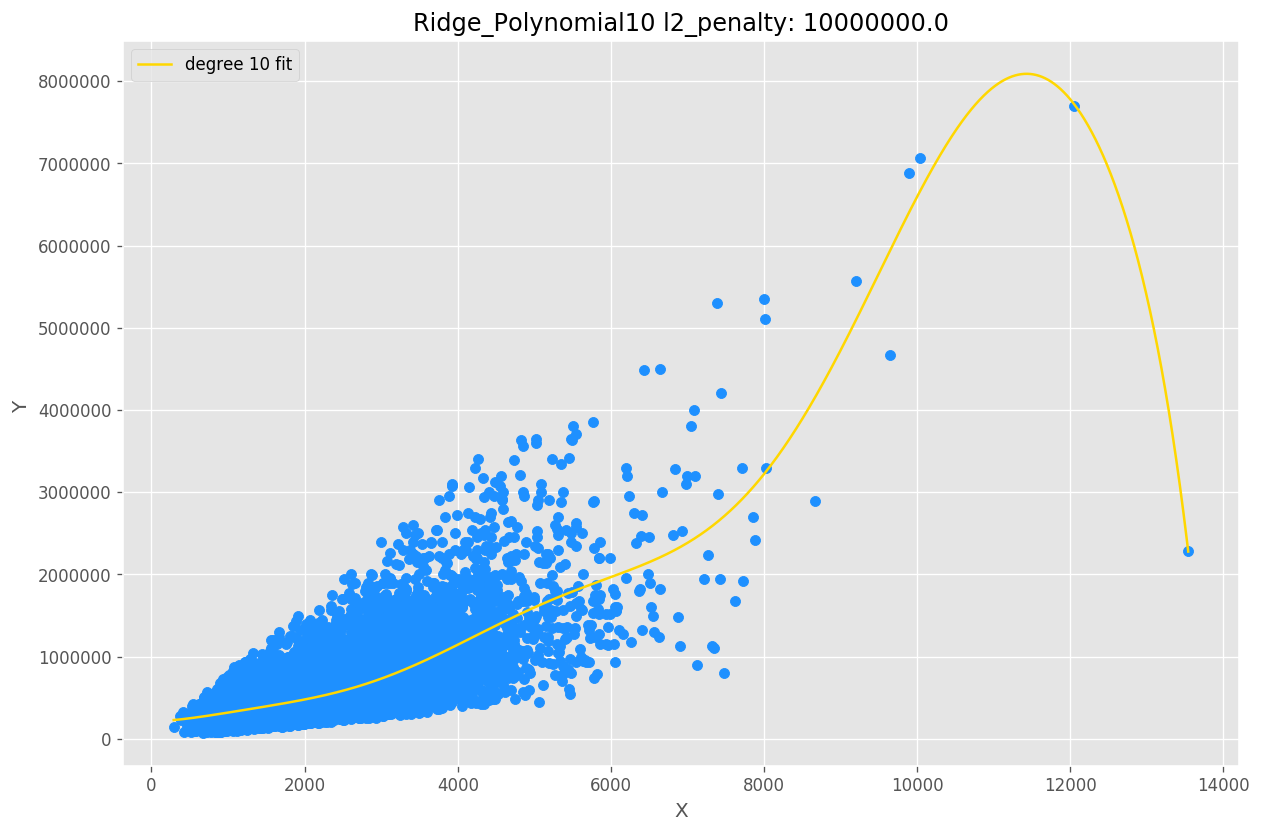

In [16]:
plot = pipe_score_ridge_poly_predictions(Xr, yr, 10, 10000000.0)